<a href="https://colab.research.google.com/github/ArthurCBx/PyTorch-DeepLearning-Udemy/blob/main/03_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision - https://pytorch.org/vision/stable/index.html#torchvision
* `torchvision.datasets` - get datasets and data loading function for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Check version
print(torchvision.__version__)

0.20.1+cu124


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torch.vision.datasets

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=True, # Do we want training or testing dataset
    transform=ToTensor(), # How do we want to transform the data?
    target_transform=None,
    download=True
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.1MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.81MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 23.4MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
print(f"Image shape: {image.shape} -> [color_channels,height,width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels,height,width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


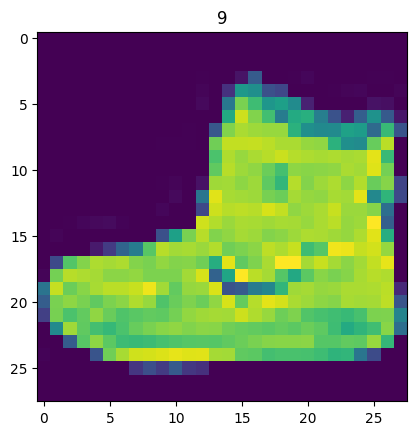

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

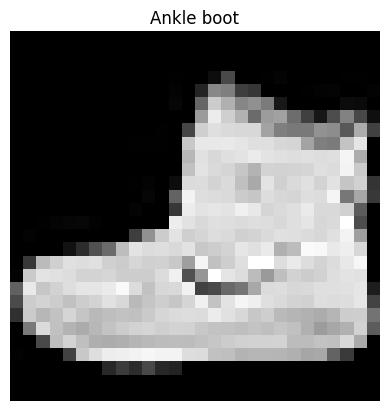

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False);

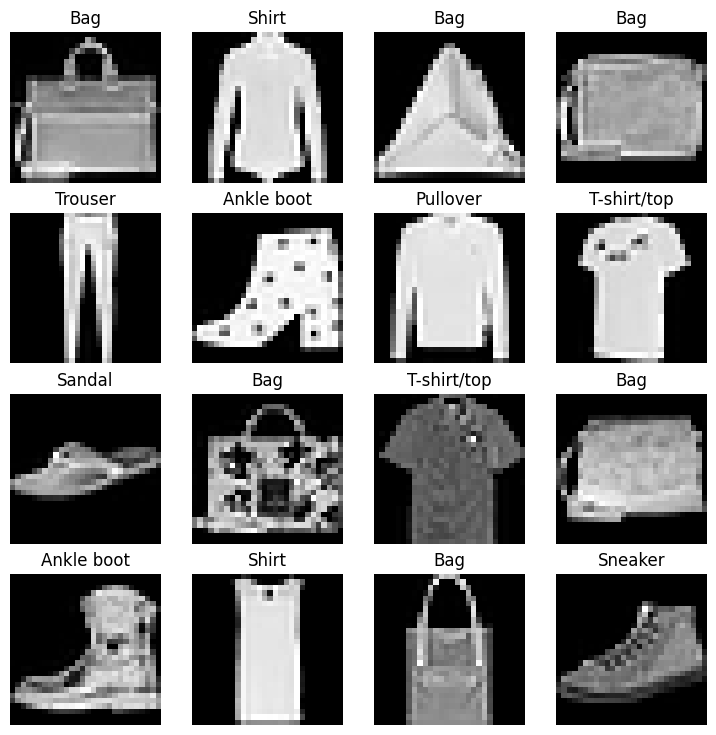

In [ ]:
# Plot more images
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data), size=[1]).item()
    img,label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

Do you think this items of clothing could be modelled with pure linear lines? Or do you think we'll need to add non-linearity?

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It's more computationally efficiente, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78a1b21b6950>,
 <torch.utils.data.dataloader.DataLoader at 0x78a1b428ba10>)

In [ ]:
# Let's check out what we've created
print(f"DataLoaders {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders (<torch.utils.data.dataloader.DataLoader object at 0x78a1b21b6950>, <torch.utils.data.dataloader.DataLoader object at 0x78a1b428ba10>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size <built-in method size of Tensor object at 0x78a1b1e3d8b0>
Image shape torch.Size([1, 28, 28])


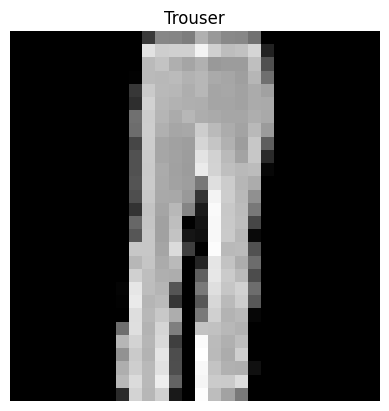

In [ ]:
# Show a sample
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False);
print(f"Image size {img.size}")
print(f"Image shape {img.shape}")

## 3. Model 0: Build a baseline model

when starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

# Flatten the sample
output = flatten_model(x) # Perform forward pass

#Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand(size=([1,1,28,28]))
model_0(dummy_x), model_0(dummy_x).shape

(tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
          -0.1004,  0.0157]], grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine Learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
# some code ...
end_time = timer()
print_train_time(start=start_time,
                 end=end_time)

Train time on None: 0.000 seconds


4.1709000015544007e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss **per batch**.
3. Loop through testing batches, perform testing steps, calculate the test loss **per batch**.
4. Print out what's happening
5. Time it all

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  ### Training
  train_loss = 0

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate the loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate the accuracy (preds need to be same as y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)
  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
--------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 32.145 seconds


In [ ]:
str(next(model_0.parameters()).device)

'cpu'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """ Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # Only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

  # Calculate model 0 results on test data
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## 6. Model 1: Building a better model with non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # Flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the flatten after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    #Put data on target device
    X,y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logis from the model)
    y_pred = model(X)

    # 2. Calculate the loss adn accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(train_dataloader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%.")

In [ ]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0,0

  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculate the loss (accumulatively)
      test_loss += loss_fn(test_pred, y)

      # 3. Calculate the accuracy (preds need to be same as y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss, acc average per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}%")

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")

  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                          end=train_time_end_on_gpu)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 1.09199 | Train acc: 61.34%.

Train loss: 0.4550 | Test loss: 0.9564, Test acc: 64.9960%
Epoch: 1
--------
Train loss: 0.78101 | Train acc: 71.93%.

Train loss: 0.4550 | Test loss: 0.7223, Test acc: 73.9117%
Epoch: 2
--------
Train loss: 0.67027 | Train acc: 75.94%.

Train loss: 0.4550 | Test loss: 0.6850, Test acc: 75.0200%
Train time on None: 26.725 seconds


> **Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by GPU.
> 2. The hardware you're using has a better CPU in terms compute capability than the GPU.

In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside CNN, see this website: https://poloclub.github.io/cnn-explainer/


In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from the CNN Explainer website.
  """
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    # Create a conv layer
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # values we can set ourselves in our NN's are called hyperparameter
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculate this
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
rand_image_tensor = torch.rand(size=(1,28,28))
rand_image_tensor.shape


torch.Size([1, 28, 28])

In [ ]:
image.shape # 1 = black and white images => input_shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0360, -0.0747,  0.0593, -0.0399, -0.0062,  0.0207,  0.0020, -0.0089,
          0.0220,  0.0003]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image=images[0]
print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
torch.manual_seed(42)
# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=(3,3),
                     stride=1,
                     padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`

In [ ]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPool2d()
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the data through the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass the data through the max_pool_layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tesnor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")
random_tensor

Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

### 7.3 Setup a loss function and optimizer for `model_2`

In [ ]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

### 7.3 Training and testing `model_2` using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                          end=train_time_end_model_2,
                                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.59275 | Train acc: 78.46%.

Train loss: 0.4550 | Test loss: 0.3913, Test acc: 85.8626%
Epoch: 1
--------
Train loss: 0.36125 | Train acc: 86.93%.

Train loss: 0.4550 | Test loss: 0.3592, Test acc: 86.7412%
Epoch: 2
--------
Train loss: 0.32335 | Train acc: 88.22%.

Train loss: 0.4550 | Test loss: 0.3263, Test acc: 88.1889%
Train time on cuda: 33.762 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3262706995010376,
 'model_acc': 88.18889776357827}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 8. Compare model results and training time


In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.326271,88.188898


In [ ]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                     total_train_time_model_1,
                                     total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,32.144972
1,FashionMNISTModelV1,0.685001,75.019968,26.724906
2,FashionMNISTModelV2,0.326271,88.188898,33.761854


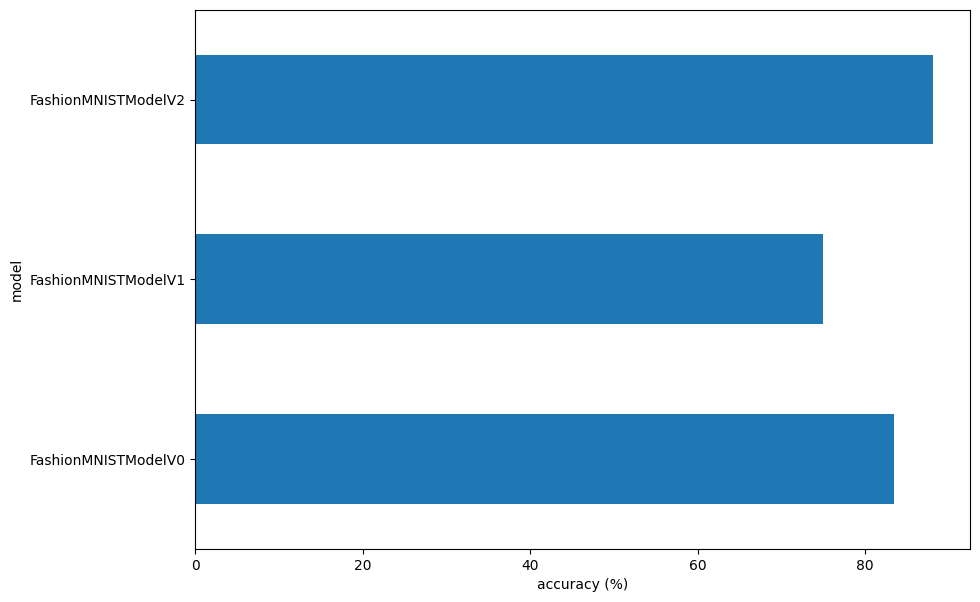

In [ ]:
# Visualize our model results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())
  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9): # 9 samples per iteration
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

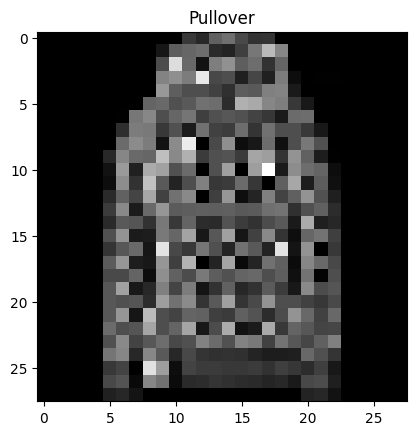

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]]);

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                             data=test_samples)

# View the first two prediction probabilities
pred_probs[:2]

tensor([[2.4614e-02, 2.0405e-02, 2.5400e-01, 1.7814e-01, 3.8195e-01, 2.2454e-04,
         1.2465e-01, 1.7355e-04, 1.5778e-02, 6.0963e-05],
        [2.6345e-05, 9.7373e-07, 2.3451e-05, 3.7737e-05, 2.4385e-06, 9.9681e-01,
         1.4555e-05, 3.0185e-04, 2.3618e-03, 4.1688e-04]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes.equal(torch.Tensor(test_labels))

False

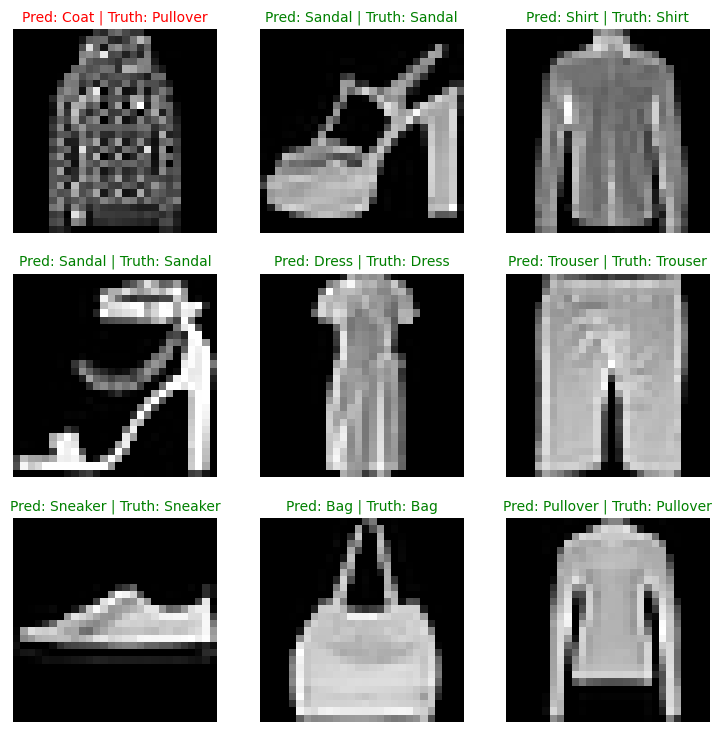

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols,i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction is correct
  else:
    plt.title(title_text, fontsize=10, c="r") # red text if prediction is wrong

  # Remove ticks from plot
  plt.axis("off")

## 10. Making a confusion magtrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually.

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` - https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html
3. plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` - http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [ ]:
import mlxtend
mlxtend.__version__

'0.23.4'

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Append predictions to CPU for evaluation
    y_preds.append(y_pred.cpu())

  # Concatenate list of predictions into a tensor
  #print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
try:
  import torchmetrics,mlxtend
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.2 MB/s eta 0:00:00


In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

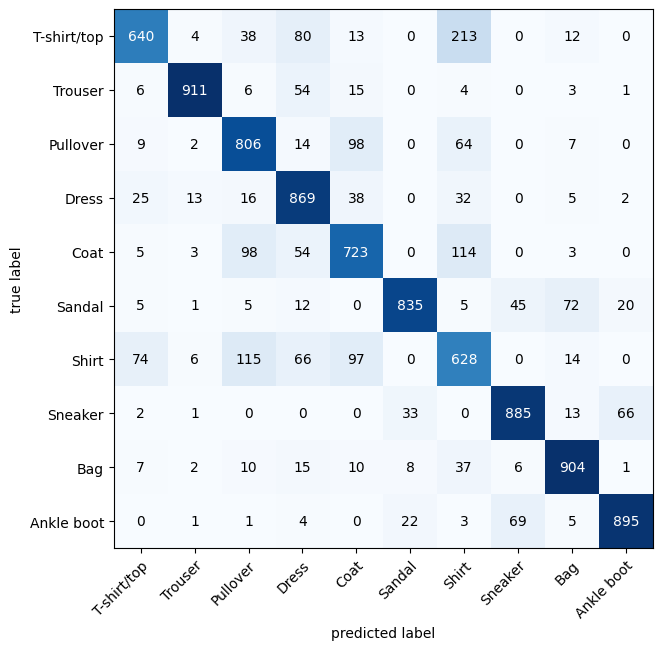

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="MULTICLASS")
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save and load best performing model

In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

<ipython-input-66-cc418dbe96f6>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3262706995010376,
 'model_acc': 88.18889776357827}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)

## Exercises
* https://www.learnpytorch.io/03_pytorch_computer_vision/#exercises

### 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
# 1. Self driving cars
# 2. Image segmentation
# 3. Desease recognition

### 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
""" When a model can't generalize identification through
different test datas because is only well fitted to some test data """

" When a model can't generalize identification through\ndifferent test datas because is only well fitted to some test data "

### 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. Note: there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
"""
1. USE MORE DATA: If the model is overfitted to some training data, just expand this dataset so that the model can learn different patterns.
2. SIMPLIFY THE MODEL: Over-complex models are more likely to overfit => remove layers or decrease the number of neurons.
3. CROSS VALIDATION: Split all data into groups of less data and let the test group be every one of this different groups. """


'\n1. USE MORE DATA: If the model is overfitted to some training data, just expand this dataset so that the model can learn different patterns.\n2. SIMPLIFY THE MODEL: Over-complex models are more likely to overfit => remove layers or decrease the number of neurons.\n3. CROSS VALIDATION: Split all data into groups of less data and let the test group be every one of this different groups. '

### 4. Spend 20-minutes reading and clicking through the CNN Explainer website - https://poloclub.github.io/cnn-explainer/. Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.

### 5. Load the `torchvision.datasets.MNIST()` train and test datasets.


In [ ]:
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root="data",
                            train=True,
                            download=True,
                            transform=ToTensor())
test_data = datasets.MNIST(root="data",
                            train=False,
                            download=True,
                            transform=ToTensor())

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.3MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 464kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.23MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 11.2MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### 6. Visualize at least 5 different samples of the MNIST training dataset.

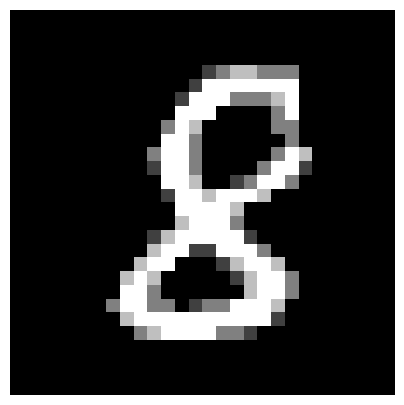

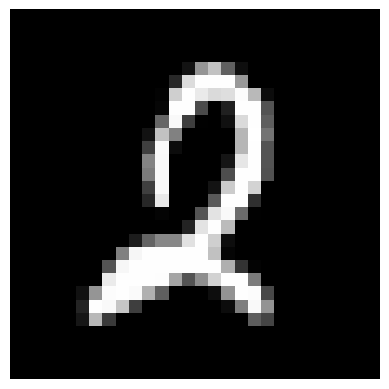

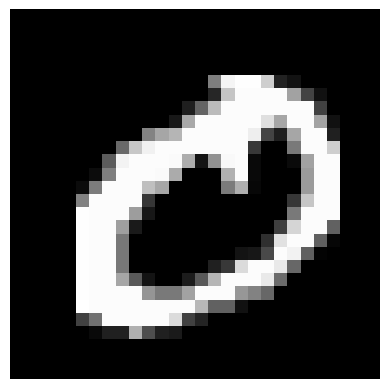

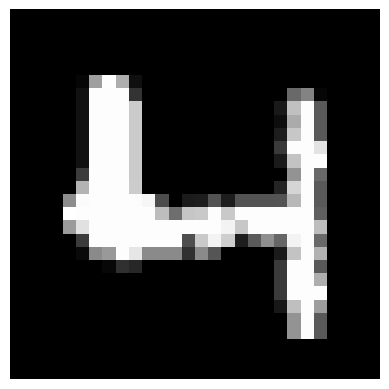

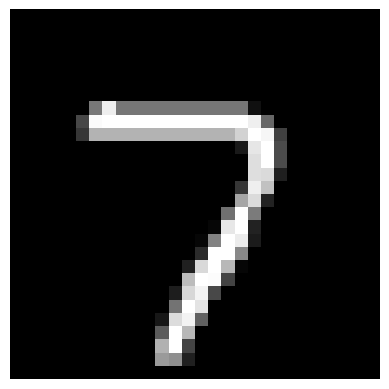

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(5,5))
for i in range(0,5,1):
  sample_idx = torch.randint(0,len(train_data),size=(1,)).item()
  img, label = train_data[sample_idx]
  plt.axis(False)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.show()

### 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,batch_size=32)
test_dataloader = DataLoader(test_data,batch_size=32)

### 8. Recreate `model_2` used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
from torch import nn
class MNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.conv_layer1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_layer2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # Calculate
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_layer1(x)
    x = self.conv_layer2(x)
    x = self.classifier(x)
    return x

In [ ]:
img.shape

torch.Size([1, 28, 28])

In [ ]:
model_test_CPU = MNISTModelV0(input_shape=1,
                           hidden_units=10,
                           output_shape=10)

### 9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_test_CPU.parameters(),lr=0.1)

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
from helper_functions import print_train_time
from helper_functions import accuracy_fn

In [ ]:
# CPU
train_time_start_CPU = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  train_step(model=model_test_CPU,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device="cpu")

  test_step(model=model_test_CPU,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device="cpu")

train_time_end_CPU = timer()
total_train_time_CPU = print_train_time(start=train_time_start_CPU,
                                          end=train_time_end_CPU,
                                          device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.55399 | Train acc: 80.44%.

Train loss: 0.4550 | Test loss: 0.1032, Test acc: 96.6054%
Train loss: 0.08089 | Train acc: 97.50%.

Train loss: 0.4550 | Test loss: 0.0747, Test acc: 97.6538%
Train loss: 0.06299 | Train acc: 98.03%.

Train loss: 0.4550 | Test loss: 0.0681, Test acc: 97.8235%

Train time on cpu: 127.152 seconds


In [ ]:
model_test_GPU = MNISTModelV0(input_shape=1,
                           hidden_units=10,
                           output_shape=10).to(device)
optimizer_GPU = torch.optim.SGD(params=model_test_GPU.parameters(),lr=0.1)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
train_time_start_GPU = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  train_step(model=model_test_GPU,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer_GPU,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_test_GPU,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_GPU = timer()
total_train_time_GPU = print_train_time(start=train_time_start_GPU,
                                          end=train_time_end_GPU,
                                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.26436 | Train acc: 91.45%.

Train loss: 0.4550 | Test loss: 0.1069, Test acc: 96.6953%
Train loss: 0.07375 | Train acc: 97.68%.

Train loss: 0.4550 | Test loss: 0.0762, Test acc: 97.7336%
Train loss: 0.05569 | Train acc: 98.27%.

Train loss: 0.4550 | Test loss: 0.0755, Test acc: 97.6438%

Train time on cuda: 32.961 seconds


### 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.

In [ ]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9): # 9 samples per iteration
  test_samples.append(sample)
  test_labels.append(label)


In [ ]:
preds_logits = make_predictions(model=model_test_GPU,
                       data=test_samples)

pred = preds_logits.argmax(dim=1)

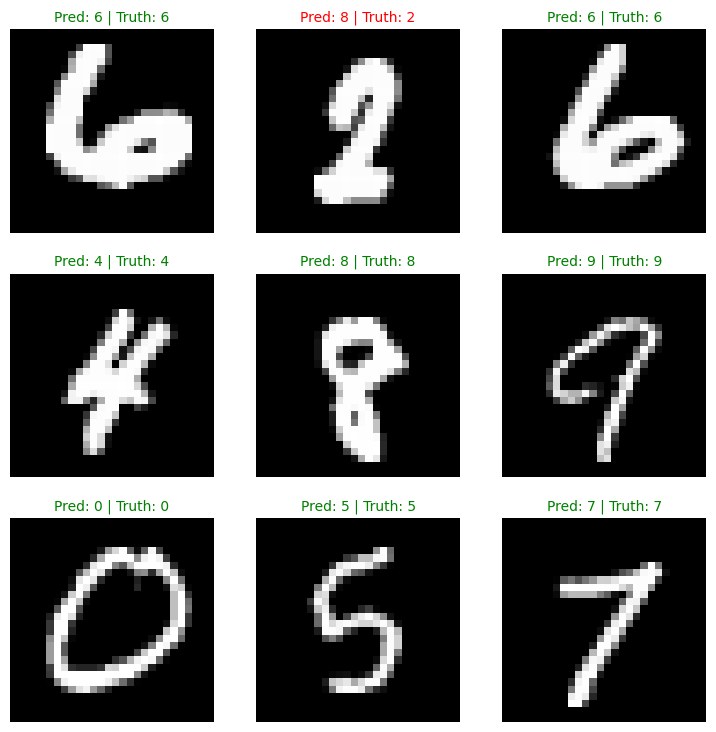

In [ ]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols,i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = pred[i].item()

  # Get the truth label (in text form)
  truth_label = test_labels[i]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction is correct
  else:
    plt.title(title_text, fontsize=10, c="r") # red text if prediction is wrong

  # Remove ticks from plot
  plt.axis("off")

### 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
model_test_GPU.eval()
y_preds = []
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    X,y = X.to(device), y.to(device)
    y_logit = model_test_GPU(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

  y_pred_tensor = torch.cat(y_preds)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

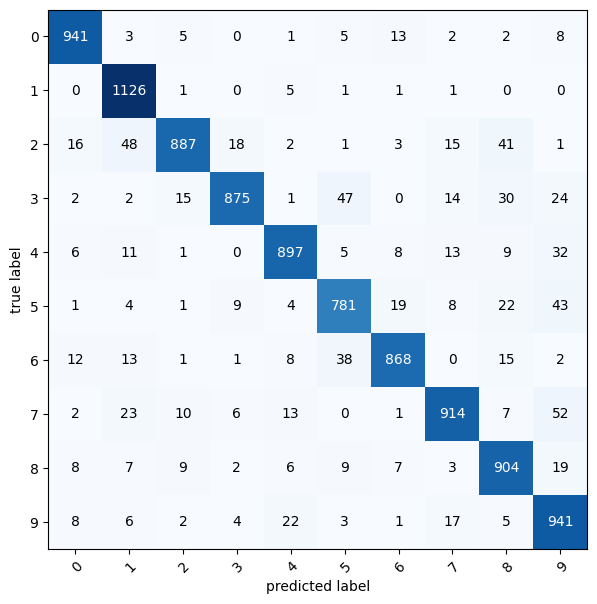

In [ ]:
confmat = ConfusionMatrix(task="multiclass",num_classes=10)
confmat_tensor = confmat(preds=y_pred_tensor,target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=[0,1,2,3,4,5,6,7,8,9],
    figsize=(10,7)
)

### 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
import torch
tensor = torch.rand(size=(1,3,64,64))
tensor

tensor([[[[2.8351e-01, 3.0597e-01, 2.2567e-01,  ..., 2.4409e-01,
           7.9862e-01, 8.4477e-01],
          [3.4374e-01, 5.2673e-01, 4.8299e-01,  ..., 7.3254e-01,
           2.8718e-02, 5.7360e-01],
          [4.9248e-01, 4.3418e-01, 1.0837e-01,  ..., 3.0653e-01,
           1.5741e-01, 7.1273e-01],
          ...,
          [7.1410e-02, 1.3852e-01, 7.8354e-01,  ..., 3.9231e-01,
           8.4848e-01, 4.4210e-01],
          [1.1018e-01, 8.3323e-02, 5.2574e-01,  ..., 9.6038e-01,
           4.1312e-01, 8.7250e-01],
          [4.1618e-01, 2.2199e-01, 5.4909e-01,  ..., 3.3009e-01,
           8.7279e-01, 1.5645e-01]],

         [[3.2164e-02, 1.3409e-01, 6.6081e-01,  ..., 8.4484e-01,
           4.6411e-02, 7.0810e-01],
          [7.7795e-01, 8.0311e-01, 2.9641e-01,  ..., 1.6427e-01,
           7.6003e-01, 6.9350e-01],
          [7.2266e-01, 2.3137e-01, 5.4962e-01,  ..., 9.1633e-01,
           6.2928e-02, 4.8982e-01],
          ...,
          [6.6456e-01, 8.8789e-01, 7.2980e-01,  ..., 4.3232

In [ ]:
from torch import nn
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=3,
                       kernel_size=3,
                       stride=4,
                       padding=1)
test = conv_layer(tensor)
print(f"Test shape: {test.shape}")
test

Test shape: torch.Size([1, 3, 16, 16])


tensor([[[[ 0.0783,  0.0261, -0.1933, -0.1609,  0.0448, -0.0564, -0.4051,
           -0.1536, -0.3709, -0.0928, -0.3143, -0.1530,  0.0591, -0.0753,
           -0.1729, -0.2489],
          [-0.2481,  0.0402, -0.4926, -0.3149, -0.3046, -0.3914, -0.6631,
           -0.2258, -0.6366, -0.4154, -0.1596, -0.1811, -0.2758, -0.1934,
           -0.1027, -0.2393],
          [-0.0953, -0.3029, -0.4416, -0.0531, -0.3023, -0.4606, -0.5603,
           -0.2194, -0.1464, -0.4050, -0.2947, -0.0688, -0.0566, -0.2096,
           -0.2989, -0.3990],
          [-0.0089, -0.2521, -0.4418, -0.3445, -0.2506, -0.1966, -0.3371,
           -0.0555, -0.3509, -0.1752, -0.0695, -0.2209, -0.1567, -0.3699,
           -0.3420, -0.3963],
          [-0.1976, -0.1826, -0.1518,  0.0620, -0.3487, -0.2950, -0.1089,
           -0.0994, -0.3627, -0.2579, -0.2297, -0.1234, -0.6028, -0.4618,
           -0.2309, -0.3331],
          [-0.1305, -0.4265, -0.3676, -0.6690, -0.4403, -0.2997, -0.3850,
           -0.0760, -0.1575, -0.3362